#### Desde los análisis realizados en este cuaderno se llegó a las siguientes conclusiones respecto a los datos:

- El momento del día en el que ocurren más accidentes va desde las 12:00 a las 18:00, con un pico entre las 16:00 y las 17:00, que coincide con el fin de la jornada laboral de muchos gremios.  

- El grupo poblacional más afectado en los accidentes está compuesto principalmente por hombres (70% hombres / 30% mujeres) y en el rango etario de 20 a 40 años. Esto podría deberse a que esta población coincida con el grupo mayoritario de conductores.  

- **El vehículo que genera más lesionados en los accidentes son las motos,** y en su mayoría conducidas por hombres.

- Las avenidas en general, incluyendo a la General Paz, son las vías de circulación que reportan un mayor número (en cantidad y en porcentaje), de muertos y heridos graves en sus accidentes. Si consideramos que la longitud de las avenidas es aproximadamente un 25% de la longitud de calles, estos datos cobran mayor importancia.   

- Se observa un pico de accidentes en la zona del "microcentro porteño", comunas 1, 3 y 4, entre las 9 y las 17. Franja horaria que como se dijo coincide con la jornada laboral de muchos gremios.  

- Un observación particularmente alarmante, y que no está en relación con los demás puntos, es la cantidad de heridos graves y fallecidos que hay en el rol de peatones, casi un 70% u 80% comparando con los fallecidos en accidentes de motos o autos. Lógicamente la mayoría de los casos ocurre en la zona del microcentro, donde hay mayor cantidad de peatones. Este tipo de accidente constituye la causa principal de los fallecidos en la gente de mayor edad.  


#### Claves: MOTOS Y PEATONES - MICROCENTRO - AVENIDAS - HORAS DIURNAS

-----------------------

In [1]:
# Importar las librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Los análisis realizados en este cuaderno están en el siguiente orden:

- Distribución Horaria
- Gravedad
- Género
- Edad
- Vehículos
- Tipo de Calle
- Comuna

- Género y Edad
- Vehículo y Edad
- Género y Vehículo
- Tipo de Calle y Vehículo
- Vehículo y Comuna
- Tipo de Calle y Comuna
- Tipo de Calle y Gravedad
- Vehículo y Gravedad
- Hora y Vehículo
- Hora y Comuna
- Hora y Tipo de Calle
- Peatones Fallecidos por Comuna

In [2]:
# Cargar el csv
df_accidentes = pd.read_csv("accidentes_2.csv")

In [5]:
df_accidentes.head()

,id,fecha,franja_hora,gravedad,sexo,edad,vehiculo_1,vehiculo_2,direccion_normalizada,tipo_calle,comuna,latitud,longitud,rango_etario
0,2016-0001,2016-01-01,4,FATAL,M,19,MOTO,AUTOMOVIL,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",AVENIDA,8,-34.68757022,-58.47533969,17-21
1,2016-0002,2016-01-02,1,FATAL,M,70,AUTOMOVIL,TRANSPORTE PUBLICO,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",GRAL PAZ,9,-34.66977709,-58.50877521,61-70
2,2016-0003,2016-01-03,7,FATAL,M,30,MOTO,AUTOMOVIL,ENTRE RIOS AV. 2034,AVENIDA,1,-34.63189362,-58.39040293,26-30
3,2016-0004,2016-01-10,0,LEVE - SIN LESIONES,M,18,MOTO,SD,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",AVENIDA,8,-34.68092974,-58.46503904,17-21
4,2016-0005,2016-01-21,5,FATAL,M,29,MOTO,TRANSPORTE PUBLICO,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",AVENIDA,1,-34.62246630,-58.38718297,26-30


## VARIABLES AISLADAS

#### Distribución Horaria

In [4]:
franja_hora = df_accidentes["franja_hora"].value_counts()

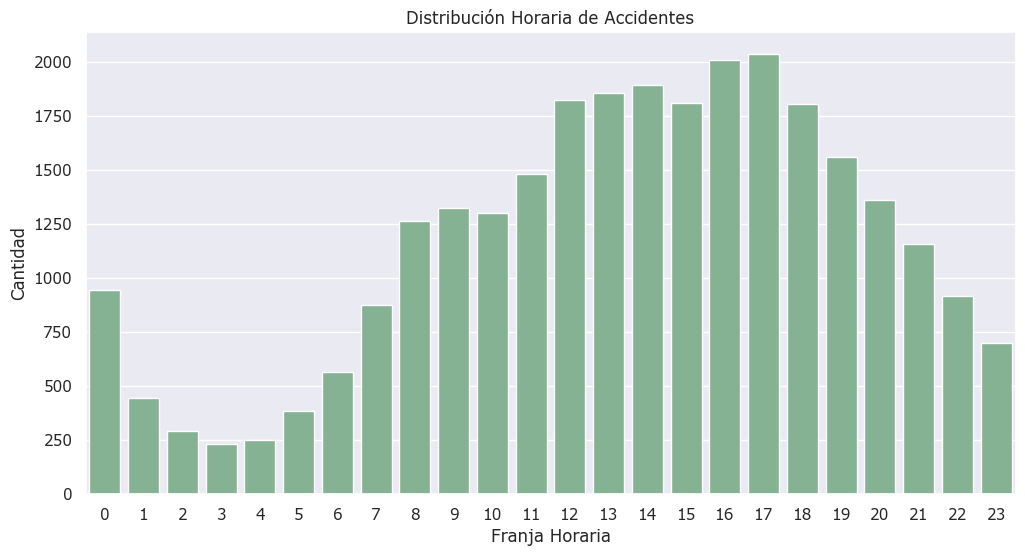

In [11]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid",palette='crest',font="Verdana",font_scale=1)
sns.barplot(x=franja_hora.index, y=franja_hora)
plt.title('Distribución Horaria de Accidentes')
plt.xlabel('Franja Horaria')
plt.ylabel("Cantidad")
plt.show()

Se observa un aumento paulatino de los accidentes en las horas diurnas, con un pico entre las 16 y las 17 horas, que coincide con en fin de la jornada laboral. Durante la noche el número de accidentes va disminuyendo, alcanzando los valores mínimos entre la 1 y las 5 de la madrugada.

#### Gravedad

In [13]:
gravedad = df_accidentes["gravedad"].value_counts()

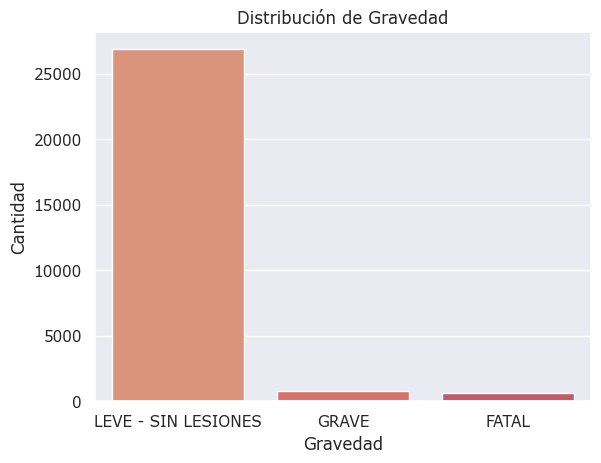

In [15]:
sns.set_theme(style="darkgrid",palette='flare',font="Verdana",font_scale=1)
sns.barplot(x=gravedad.index, y=gravedad, hue=gravedad.index)
plt.title('Distribución de Gravedad')
plt.xlabel('Gravedad')
plt.ylabel("Cantidad")
plt.show()

Lógicamente, la cantidad de accidentes con heridas leves o sin lesiones es muy superior a la de graves o con fallecidos. Incluso siendo que el dataset de casos fatales abarca un período de tiempo dos veces mayor.

#### Género

In [16]:
total = df_accidentes.__len__()
hombres = df_accidentes["sexo"].value_counts()[0]
mujeres = df_accidentes["sexo"].value_counts()[1]
print(hombres*100/total)
print(mujeres*100/total)

68.85749602684089
31.1425039731591


C:\Users\Usuario\AppData\Local\Temp\ipykernel_9864\2012252851.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hombres = df_accidentes["sexo"].value_counts()[0]
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9864\2012252851.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mujeres = df_accidentes["sexo"].value_counts()[1]


In [19]:
genero = df_accidentes["sexo"].value_counts()

<Figure size 600x600 with 0 Axes>

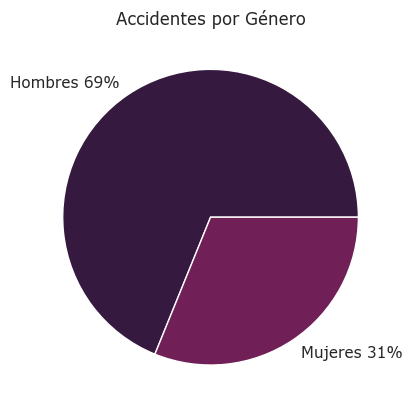

In [20]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid",palette='rocket',font="Verdana",font_scale=1)
fig, ax = plt.subplots()
ax.pie(genero, labels=["Hombres 69%", "Mujeres 31%"])
plt.title('Accidentes por Género')
plt.show()

Este gráfico solo permite una interpretación literal, sobre que hay más accidentados hombres que mujeres.

#### Edad

In [25]:
edad = df_accidentes["edad"].value_counts()

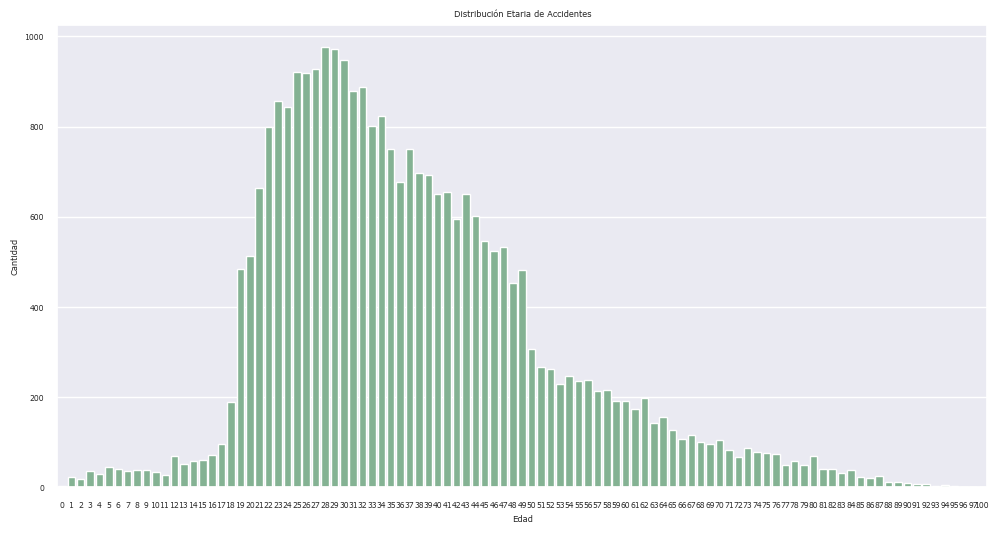

In [26]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid",palette='crest',font="Verdana",font_scale=0.5)
sns.barplot(x=edad.index, y=edad)
plt.title('Distribución Etaria de Accidentes')
plt.xlabel('Edad')
plt.ylabel("Cantidad")
plt.show()

#### Me parece más adecuado trabajar las edades por rango etario.

In [27]:
# Definir los límites de los grupos de edades
edades_minimas = [0, 11, 17, 22, 26, 31, 36, 41, 46, 51, 61, 71]
edades_maximas = [10, 16, 21, 25, 30, 35, 40, 45, 50, 60, 70, 100]

# Crear una función para asignar el rango etario según la edad
def asignar_rango_etario(edad):
    for i in range(len(edades_minimas)):
        if edades_minimas[i] <= edad <= edades_maximas[i]:
            return f"{edades_minimas[i]}-{edades_maximas[i]}"

In [28]:
# Aplicar la función a la columna 'edad' para crear la columna 'rango_etario'
df_accidentes['rango_etario'] = df_accidentes['edad'].apply(asignar_rango_etario)

df_accidentes[['edad', 'rango_etario']].head(10)

,edad,rango_etario
0,19,17-21
1,70,61-70
2,30,26-30
3,18,17-21
4,29,26-30
5,30,26-30
6,29,26-30
7,18,17-21
8,22,22-25
9,16,11-16


In [29]:
rango = df_accidentes["rango_etario"].value_counts()
rango.sort_index(inplace=True)

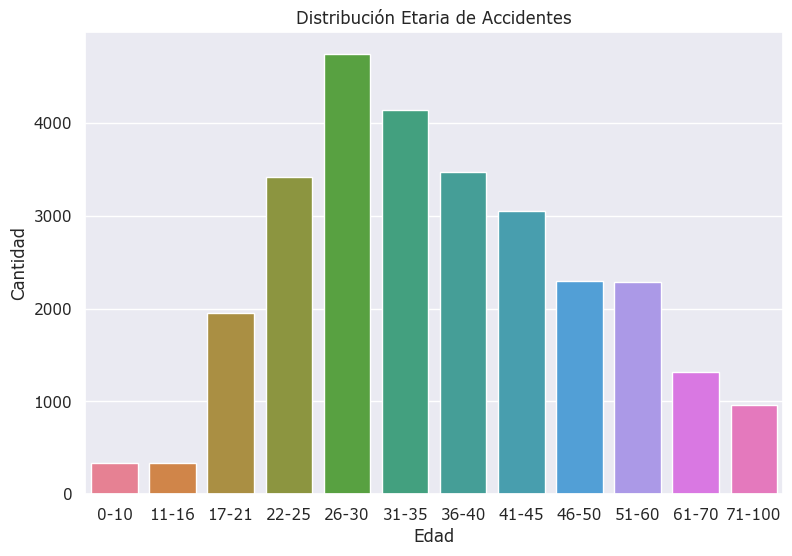

In [30]:
plt.figure(figsize=(9,6))
sns.set_theme(style="darkgrid",palette='rocket',font="Verdana",font_scale=1)
sns.barplot(x=rango.index, y=rango, hue=rango.index)
plt.title('Distribución Etaria de Accidentes')
plt.xlabel('Edad')
plt.ylabel("Cantidad")
plt.show()

Se observa a partir de la interpretación de ambos gráficos, que el pico de accidentes se da en torno a los 30 años. De todos modos, al igual que para las otras variables, sin saber la distribución de los conductores totales no se puede inferir que a esa edad se den más accidentes, ya que seguramente coincide con la edad en la que hay más conductores. De todos modos puede ser un rango etario sobre el cual focalizar cualquier tipo de campaña.

In [51]:
# Guardar el csv con el rango etario
df_accidentes.to_csv("accidentes_2.csv", index=False)

#### Vehículos

In [61]:
vehiculo_1 = df_accidentes["vehiculo_1"][df_accidentes["vehiculo_1"] != "SD"].value_counts()
vehiculo_2 = df_accidentes["vehiculo_2"][df_accidentes["vehiculo_2"] != "SD"].value_counts()

<Figure size 600x600 with 0 Axes>

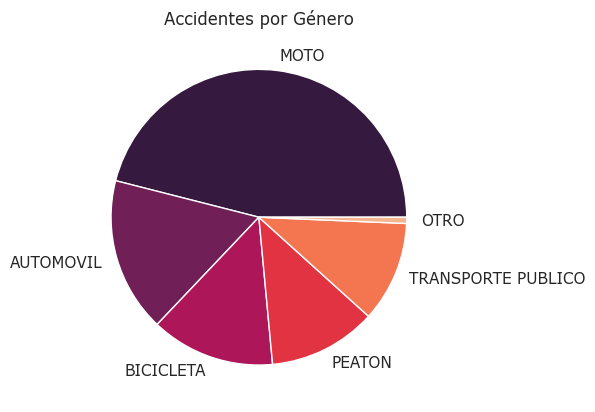

In [64]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid",palette='rocket',font="Verdana",font_scale=1)
fig, ax = plt.subplots()
ax.pie(vehiculo_1, labels=vehiculo_1.keys())
plt.title('Accidentes por Género')
plt.show()

De este gráfico se observa que en casi el 50% de los accidentes hay una moto implicada. Por lo que acá hay un segmento sobre el cual hacer foco.

#### Tipo de Calle

In [18]:
tipo_via = df_accidentes["tipo_calle"][df_accidentes["tipo_calle"] != "SD"].value_counts()

<Figure size 600x600 with 0 Axes>

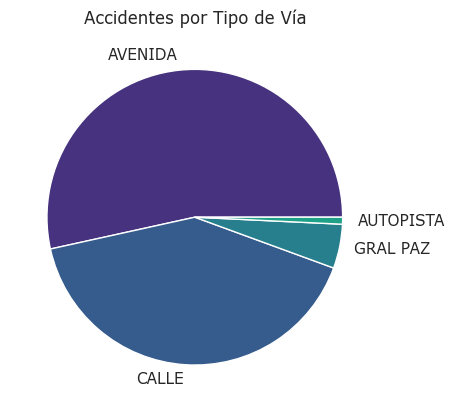

In [65]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid",palette='viridis',font="Verdana",font_scale=1)
fig, ax = plt.subplots()
ax.pie(tipo_via, labels=tipo_via.index)
plt.title('Accidentes por Tipo de Vía')
plt.show()

In [19]:
tipo_via

tipo_calle
AVENIDA      8251
CALLE        6323
GRAL PAZ      745
AUTOPISTA     117
Name: count, dtype: int64

**A partir de datos descargados de internet. Pude estimar 573 km de avenidas y 2306 km de calles en Capital Federal, más 24 km que mide la "General Paz".** Si establecemos indicadores pensados como accidentes/kilómetros, tenemos:  
- General Paz 31.04 Acc/km
- Avenidas varias 14.40 Acc/km
- Calles 2.74 Acc/km  

A modo de ejemplo, tenemos un accidente cada 3 o 4 calles, 1.5 accidentes por esquina en las avenidas y la alarmante cifra de 3 accidentes cada 100 metros en la General Paz (en los años considerados por el estudio).  
Por lo tanto, estamos en presencia de otro insight, que pone el foco en la avenida General Paz y en el resto de lass avenidas como arterias con un índice de accidentes totalmente superior al de las calles. Lógicamente no es para descuidar las calles, porque al tener más longitud, aportan muchos accidentes, pero las avenidas son arterias con más accidentes donde se podrían implementar mejor acciones preventivas, debido a que la extensión a cubrir es casi 3 veces menor.

#### Comuna

In [6]:
comuna = df_accidentes["comuna"].value_counts()

<img src="../data/mapa_comunas.jpg" alt="Texto alternativo" width="600">

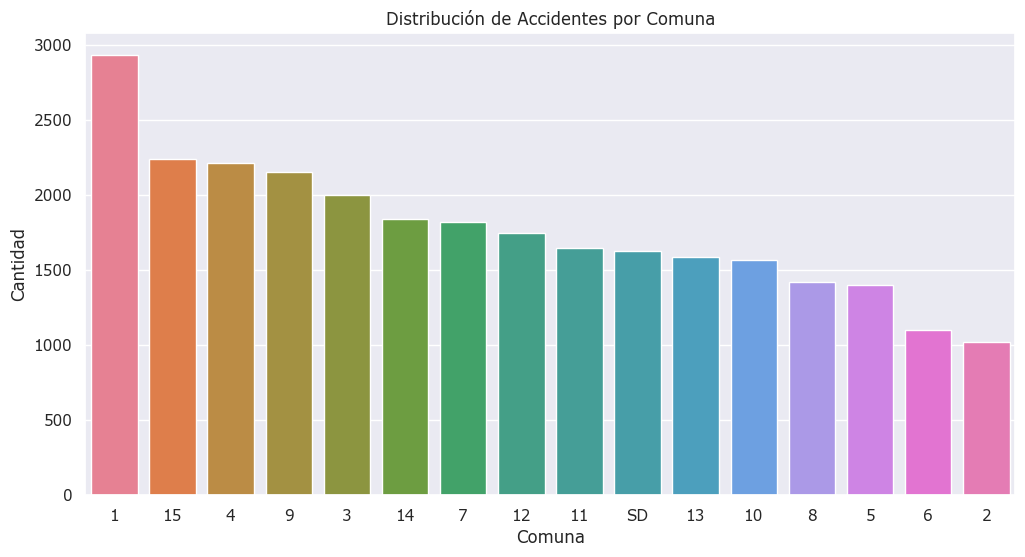

In [18]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid",palette='rocket',font="Verdana",font_scale=1)
sns.barplot(x=comuna.index, y=comuna, hue=comuna.index)
plt.title('Distribución de Accidentes por Comuna')
plt.xlabel('Comuna')
plt.ylabel("Cantidad")
plt.show()

In [9]:
df_comunas = pd.read_excel("../data/comunas.xlsx")
df_comunas

,Número Comuna,Población (2010),Superficie (km2)
0,1,205886,17.4
1,2,157932,6.1
2,3,187537,6.4
3,4,218245,21.6
4,5,179005,6.7
5,6,176076,6.8
6,7,220591,12.4
7,8,187237,21.9
8,9,161797,16.8
9,10,166022,12.7


La distribución por comuna es bastante homogenea. Se observa un valor particularmente alto en la comuna uno, que corresponde a toda la zona del "microcentro porteño", tendencia que se refuerza con los valores de la comuna 3, que a pesar de ser una de las de menor superficie, tiene muchos accidentes y también la comuna 4. Llama la atención la cantidad de accidentes de la comuna 15. Entiendo que los valores un poco bajos en las comunas 2, 5 y 6 se corresponden con su menor superficie. La comuna 8, a pesar de ser la de mayor superficie, es una de las que tienen menos accidentes, aunque su población también es una de las menores.  
**Como conclusión de esta variable, hay que poner el foco en la zona del microcentro.**

## VARIABLES EN CONJUNTO

### GÉNERO - EDAD - VEHÍCULO

#### Género y Edad

In [48]:
genero_edad = df_accidentes[["sexo", "rango_etario"]]
genero_edad.head(5)

,sexo,rango_etario
0,M,17-21
1,M,61-70
2,M,26-30
3,M,17-21
4,M,26-30


In [49]:
genero_edad.sort_values(by='rango_etario', inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7808\3761622190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genero_edad.sort_values(by='rango_etario', inplace=True)


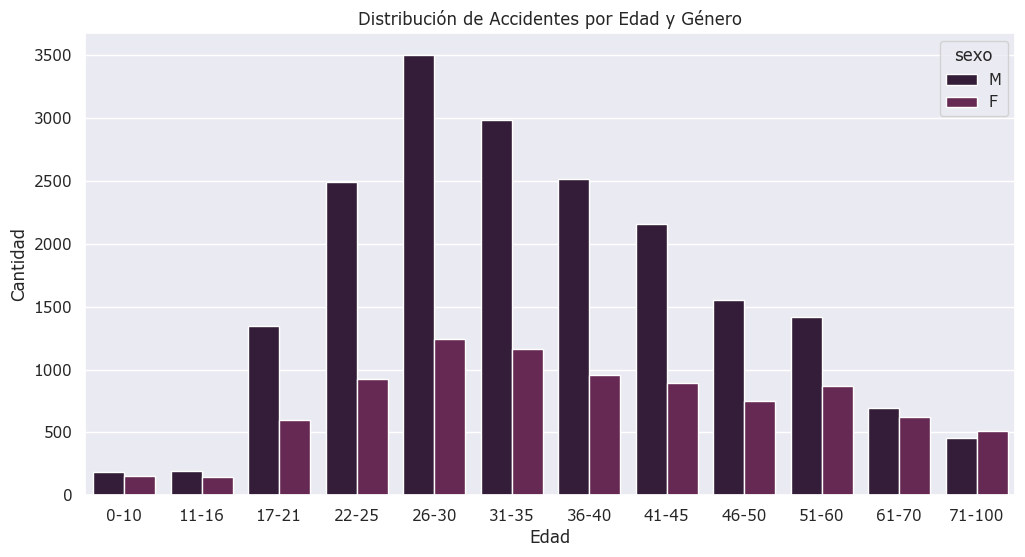

In [83]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid",palette='rocket',font="Verdana",font_scale=1)
sns.countplot(data=genero_edad, x='rango_etario', hue='sexo')
plt.title('Distribución de Accidentes por Edad y Género')
plt.xlabel('Edad')
plt.ylabel("Cantidad")
plt.show()

No hay conclusiones que pueda sacar de este gráfico. Solo comentar que en edades tempranas y en la vejez, no se mantiene la relación de 70/30 vista más arriba en la distribución de géneros. Esto tiene lógica porque los niños y ancianos lesionados son siempre pasajeros, y los son de cualquiera de los dos géneros indistintamente.

#### Vehículo y Edad

En este caso hay un problema a considerar. Para cada edad (de víctima) habría dos vehículos, pero solo corresponde considerar la columna de vehiculo_1, que es la que se derivó de las columnas de víctima.

In [64]:
vehiculo_edad = df_accidentes[["vehiculo_1", "rango_etario"]]
vehiculo_edad.drop(vehiculo_edad[vehiculo_edad['vehiculo_1'] == 'SD'].index, inplace=True)

vehiculo_edad.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7808\776538089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehiculo_edad.drop(vehiculo_edad[vehiculo_edad['vehiculo_1'] == 'SD'].index, inplace=True)


,vehiculo_1,rango_etario
0,MOTO,17-21
1,AUTOMOVIL,61-70
2,MOTO,26-30
3,MOTO,17-21
4,MOTO,26-30


In [66]:
vehiculo_edad.sort_values(by='rango_etario', inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7808\3481743809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehiculo_edad.sort_values(by='rango_etario', inplace=True)


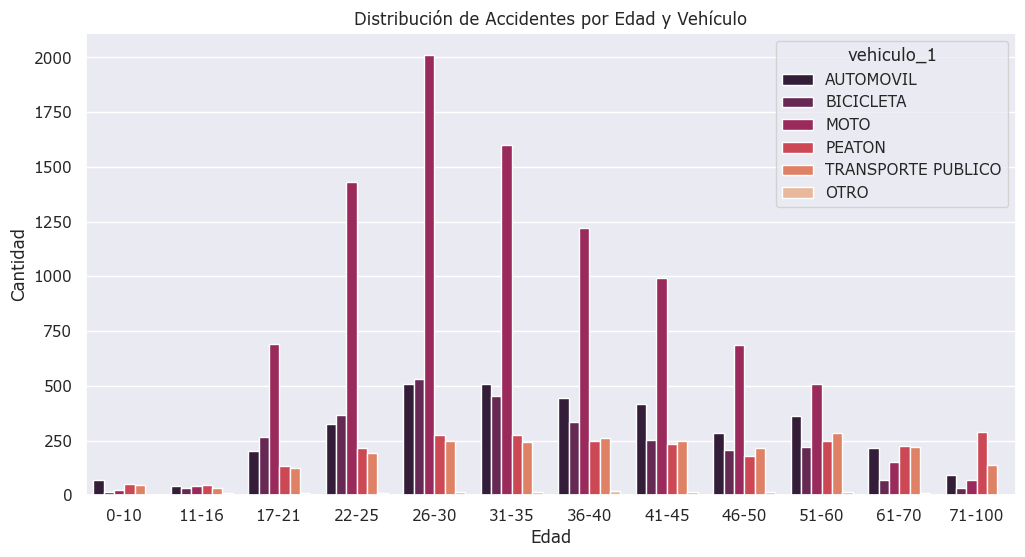

In [82]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid",palette='rocket',font="Verdana",font_scale=1)
sns.countplot(data=vehiculo_edad, x='rango_etario', hue="vehiculo_1")
plt.title('Distribución de Accidentes por Edad y Vehículo')
plt.xlabel('Edad')
plt.ylabel("Cantidad")
plt.show()

Nuevamente se evidencia el problema de los accidentes en moto, sobre todo en las edades en las que más lesionados hay. Notar también que en las personas mayores, el problema principal son los atropellos peatonales.

#### Género y Vehículo

In [86]:
genero_vehiculo = df_accidentes[["sexo", "vehiculo_1"]]
genero_vehiculo.drop(genero_vehiculo[genero_vehiculo['vehiculo_1'] == 'SD'].index, inplace=True)
genero_vehiculo.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7808\1620722612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genero_vehiculo.drop(genero_vehiculo[genero_vehiculo['vehiculo_1'] == 'SD'].index, inplace=True)


,sexo,vehiculo_1
0,M,MOTO
1,M,AUTOMOVIL
2,M,MOTO
3,M,MOTO
4,M,MOTO


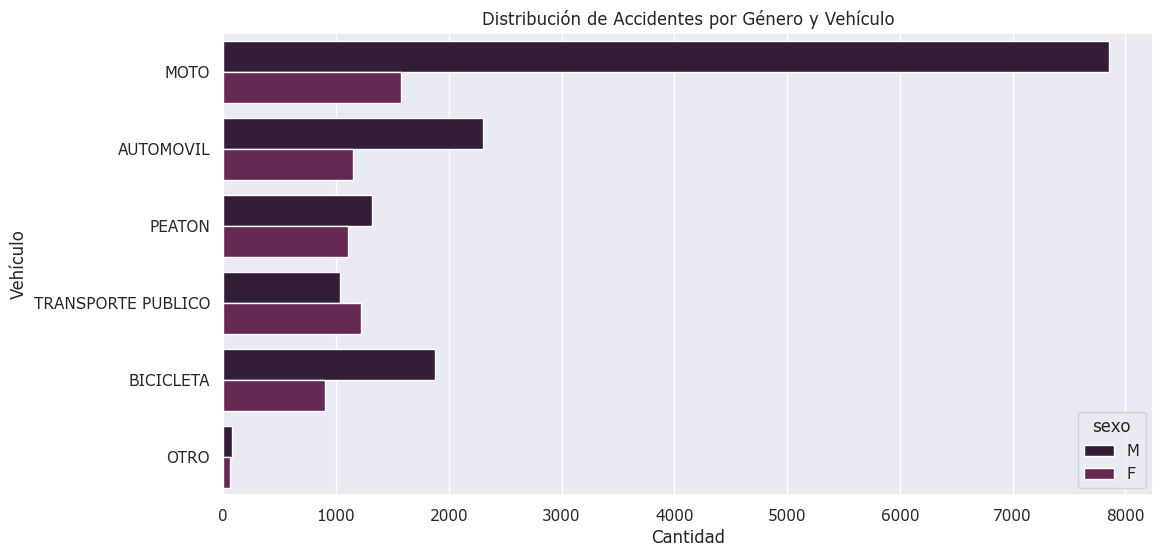

In [88]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid",palette='rocket',font="Verdana",font_scale=1)
sns.countplot(data=genero_vehiculo, y='vehiculo_1', hue="sexo")
plt.title('Distribución de Accidentes por Género y Vehículo')
plt.xlabel('Cantidad')
plt.ylabel("Vehículo")
plt.show()

El "problema" de los accidentes en motocicleta es más grave en hombres que en mujeres. La tendencia 70/30 general del dataset se acentúa aún más hacia el género masculino en el caso de los ciclomotores.

### TIPO de CALLE - VEHÍCULO - COMUNA

#### Tipo de Calle y Vehículo

In [6]:
calle_vehiculo1 = df_accidentes[["tipo_calle", "vehiculo_1"]]
calle_vehiculo2 = df_accidentes[["tipo_calle", "vehiculo_2"]]
calle_vehiculo1.drop(calle_vehiculo1[calle_vehiculo1['vehiculo_1'] == 'SD'].index, inplace=True)
calle_vehiculo2.drop(calle_vehiculo2[calle_vehiculo2['vehiculo_2'] == 'SD'].index, inplace=True)
calle_vehiculo1.rename(columns={"vehiculo_1": "vehiculo"}, inplace=True)
calle_vehiculo2.rename(columns={"vehiculo_2": "vehiculo"}, inplace=True)
calle_vehiculo = pd.concat([calle_vehiculo1, calle_vehiculo2], ignore_index=True)
calle_vehiculo.head()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_14604\3519031784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calle_vehiculo1.drop(calle_vehiculo1[calle_vehiculo1['vehiculo_1'] == 'SD'].index, inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_14604\3519031784.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calle_vehiculo2.drop(calle_vehiculo2[calle_vehiculo2['vehiculo_2'] == 'SD'].index, inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_14604\3519031784.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

,tipo_calle,vehiculo
0,AVENIDA,MOTO
1,GRAL PAZ,AUTOMOVIL
2,AVENIDA,MOTO
3,AVENIDA,MOTO
4,AVENIDA,MOTO


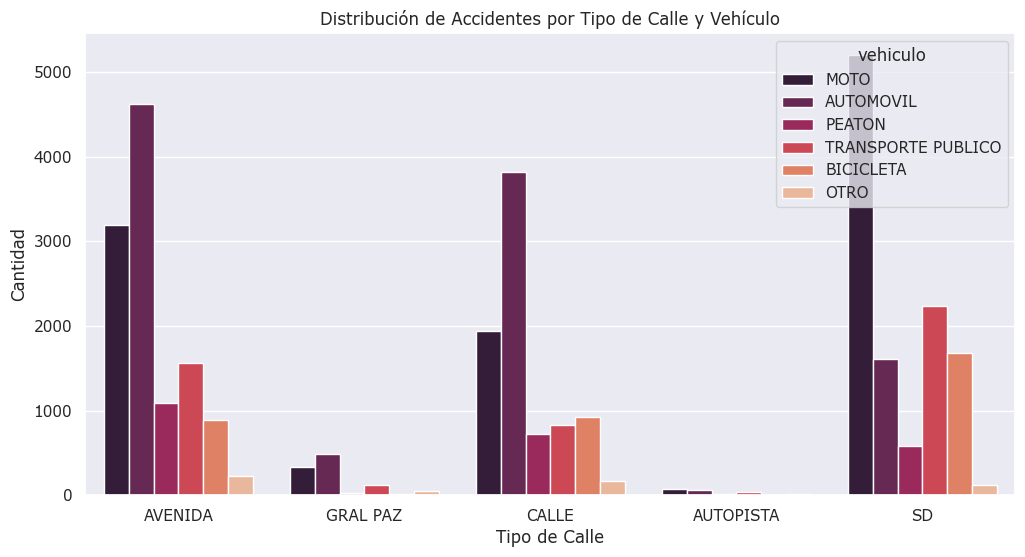

In [16]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid",palette='rocket',font="Verdana",font_scale=1)
sns.countplot(data=calle_vehiculo, x="tipo_calle", hue="vehiculo")
plt.title('Distribución de Accidentes por Tipo de Calle y Vehículo')
plt.xlabel('Tipo de Calle')
plt.ylabel("Cantidad")
plt.show()

En este caso no vamos a poder relacionar los accidentes de motos con algún tipo de arteria, porque se observa que la mayoría no tiene datos sobre el tipo de calle. Aún así, si se distribuyeran los accidentes que involucran motos a los tipos de calles, en principio tampoco se aprecia algún dato revelador. Parece haber una leve tendencia a que los accidentes de moto sean mayores en las avenidas. 

#### Vehículo y Comuna

In [13]:
comuna_vehiculo1 = df_accidentes[["comuna", "vehiculo_1"]]
comuna_vehiculo2 = df_accidentes[["comuna", "vehiculo_2"]]
comuna_vehiculo1.drop(comuna_vehiculo1[comuna_vehiculo1['vehiculo_1'] == 'SD'].index, inplace=True)
comuna_vehiculo2.drop(comuna_vehiculo2[comuna_vehiculo2['vehiculo_2'] == 'SD'].index, inplace=True)
comuna_vehiculo1.rename(columns={"vehiculo_1": "vehiculo"}, inplace=True)
comuna_vehiculo2.rename(columns={"vehiculo_2": "vehiculo"}, inplace=True)
comuna_vehiculo = pd.concat([comuna_vehiculo1, comuna_vehiculo2], ignore_index=True)
comuna_vehiculo.drop(comuna_vehiculo[comuna_vehiculo['comuna'] == 'SD'].index, inplace=True)
comuna_vehiculo.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14604\1072091062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comuna_vehiculo1.drop(comuna_vehiculo1[comuna_vehiculo1['vehiculo_1'] == 'SD'].index, inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_14604\1072091062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comuna_vehiculo2.drop(comuna_vehiculo2[comuna_vehiculo2['vehiculo_2'] == 'SD'].index, inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_14604\1072091062.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

,comuna,vehiculo
0,8,MOTO
1,9,AUTOMOVIL
2,1,MOTO
3,8,MOTO
4,1,MOTO


In [14]:
comuna_vehiculo.sort_values(by='comuna', inplace=True)

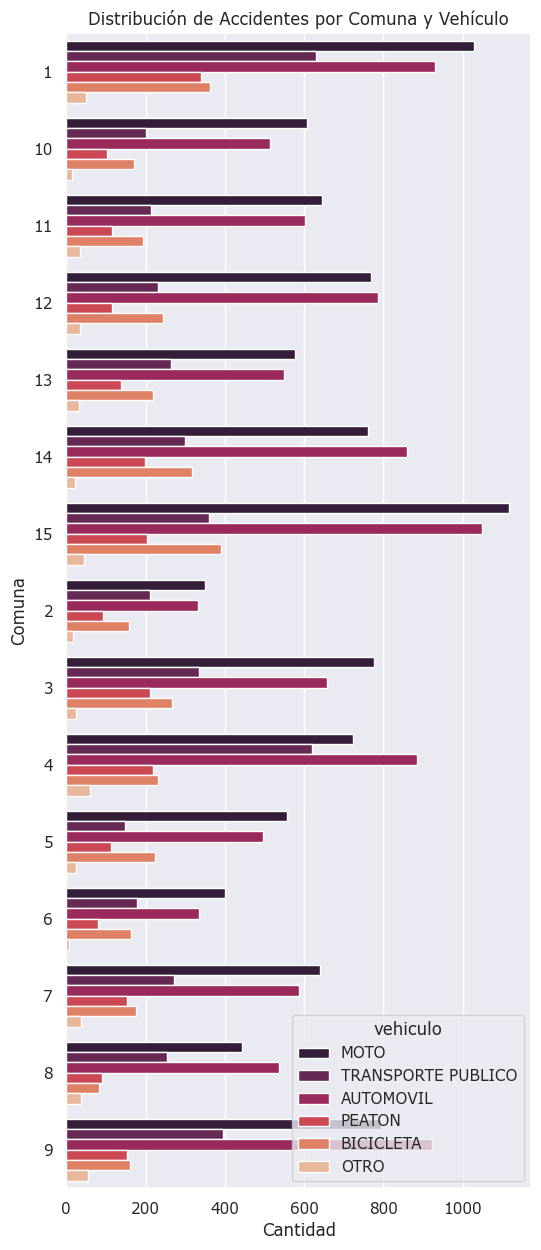

In [17]:
plt.figure(figsize=(6,15))
sns.set_theme(style="darkgrid",palette='rocket',font="Verdana",font_scale=1)
sns.countplot(data=comuna_vehiculo, y="comuna", hue="vehiculo")
plt.title('Distribución de Accidentes por Comuna y Vehículo')
plt.xlabel('Cantidad')
plt.ylabel("Comuna")
plt.show()

En este caso tampoco hay relaciones claras o grandes variaciones entre los accidentes del tipo de vehículo y las comunas.

#### Tipo de Calle y Comuna

In [22]:
calle_comuna = df_accidentes[["tipo_calle", "comuna"]]
calle_comuna.drop(calle_comuna[calle_comuna['tipo_calle'] == 'SD'].index, inplace=True)
calle_comuna.drop(calle_comuna[calle_comuna['comuna'] == 'SD'].index, inplace=True)
calle_comuna.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14604\2805896546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calle_comuna.drop(calle_comuna[calle_comuna['tipo_calle'] == 'SD'].index, inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_14604\2805896546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calle_comuna.drop(calle_comuna[calle_comuna['comuna'] == 'SD'].index, inplace=True)


,tipo_calle,comuna
0,AVENIDA,8
1,GRAL PAZ,9
2,AVENIDA,1
3,AVENIDA,8
4,AVENIDA,1


In [23]:
calle_comuna.sort_values(by='comuna', inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14604\3303833465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calle_comuna.sort_values(by='comuna', inplace=True)


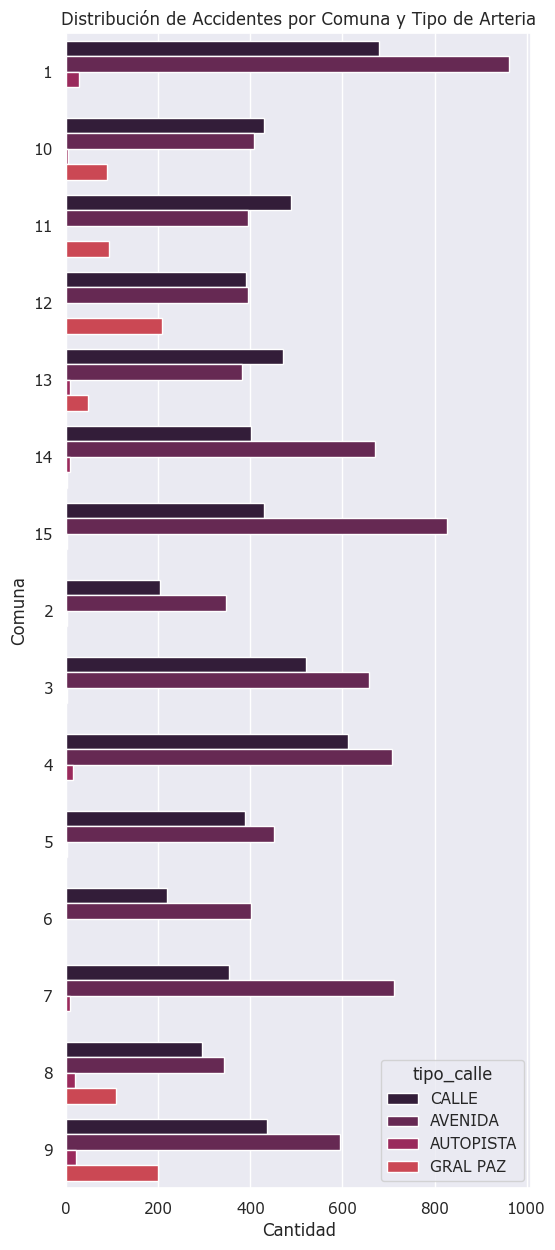

In [24]:
plt.figure(figsize=(6,15))
sns.set_theme(style="darkgrid",palette='rocket',font="Verdana",font_scale=1)
sns.countplot(data=calle_comuna, y="comuna", hue="tipo_calle")
plt.title('Distribución de Accidentes por Comuna y Tipo de Arteria')
plt.xlabel('Cantidad')
plt.ylabel("Comuna")
plt.show()

Este gráfico no aporta descubrimientos nuevos para el análisis, pero servirá a la hora de determinar en que comunas poner el foco para cada tipo de campaña (General Paz, Avenidas o Calles).

### TIPO de CALLE - VEHÍCULO - GRAVEDAD

#### Tipo de Calle y Gravedad

In [4]:
calle_gravedad = df_accidentes[["tipo_calle", "gravedad"]]
calle_gravedad.drop(calle_gravedad[calle_gravedad['tipo_calle'] == 'SD'].index, inplace=True)
calle_gravedad.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9084\3041396779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calle_gravedad.drop(calle_gravedad[calle_gravedad['tipo_calle'] == 'SD'].index, inplace=True)


,tipo_calle,gravedad
0,AVENIDA,FATAL
1,GRAL PAZ,FATAL
2,AVENIDA,FATAL
3,AVENIDA,LEVE - SIN LESIONES
4,AVENIDA,FATAL


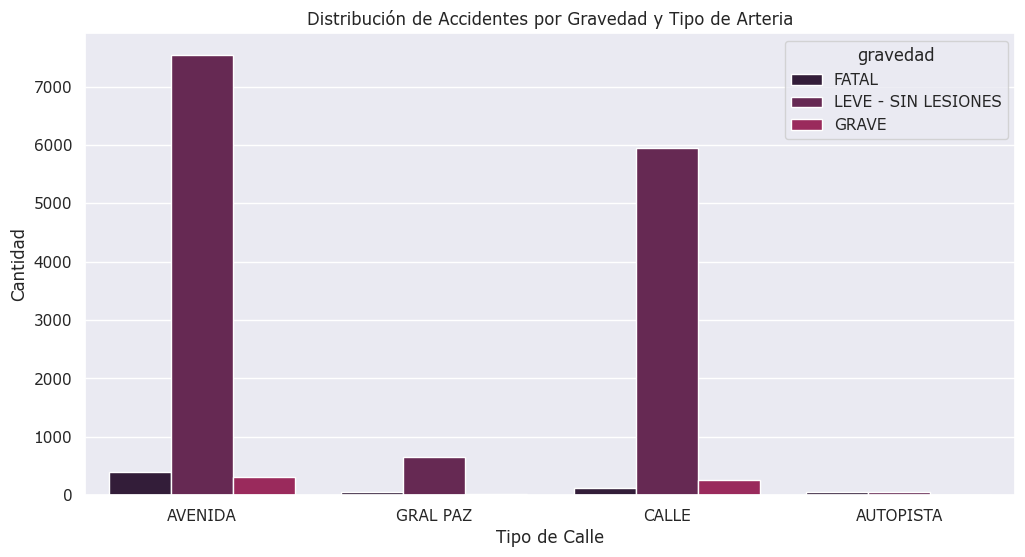

In [5]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid",palette='rocket',font="Verdana",font_scale=1)
sns.countplot(data=calle_gravedad, x="tipo_calle", hue="gravedad")
plt.title('Distribución de Accidentes por Gravedad y Tipo de Arteria')
plt.xlabel('Tipo de Calle')
plt.ylabel("Cantidad")
plt.show()

In [11]:
resultado = calle_gravedad.groupby('tipo_calle')['gravedad'].value_counts().unstack(fill_value=0)
resultado['Total'] = resultado['FATAL'] + resultado['LEVE - SIN LESIONES'] + resultado['GRAVE']
resultado['Fatal'] = round((resultado['FATAL'] * 100 / resultado['Total']), 0) 
resultado['Grave'] = round((resultado['GRAVE'] * 100 / resultado['Total']), 0) 
resultado['Leve'] = round((resultado['LEVE - SIN LESIONES'] * 100 / resultado['Total']), 0)
resultado

gravedad,FATAL,GRAVE,LEVE - SIN LESIONES,Total,Fatal,Grave,Leve
tipo_calle,,,,,,,
AUTOPISTA,59,5,53,117,50.0,4.0,45.0
AVENIDA,403,311,7537,8251,5.0,4.0,91.0
CALLE,126,255,5942,6323,2.0,4.0,94.0
GRAL PAZ,62,29,654,745,8.0,4.0,88.0


Con este gráfico se refuerza la posición de las avenidas (y eventualmente la General Paz) como el punto sobre el cual hay que poner el foco de los análisis y las medidas a tomar. Si bien, porcentualmente los accidentes graves o fatales son mucho más altos en General Paz y Autopistas, cuantitativamente, la mayor cantidad de muertes y heridos graves se da en las avenidas.

#### Vehículo y Gravedad

COmo ya se explicó antes, al momento de establecer relaciones con la víctima, solo debe considerarse el vehículo de la primer columna (vehiculo_1).

In [3]:
vehiculo_gravedad = df_accidentes[["vehiculo_1", "gravedad"]]
vehiculo_gravedad.drop(vehiculo_gravedad[vehiculo_gravedad['vehiculo_1'] == 'SD'].index, inplace=True)
vehiculo_gravedad.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10808\158831432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehiculo_gravedad.drop(vehiculo_gravedad[vehiculo_gravedad['vehiculo_1'] == 'SD'].index, inplace=True)


,vehiculo_1,gravedad
0,MOTO,FATAL
1,AUTOMOVIL,FATAL
2,MOTO,FATAL
3,MOTO,LEVE - SIN LESIONES
4,MOTO,FATAL


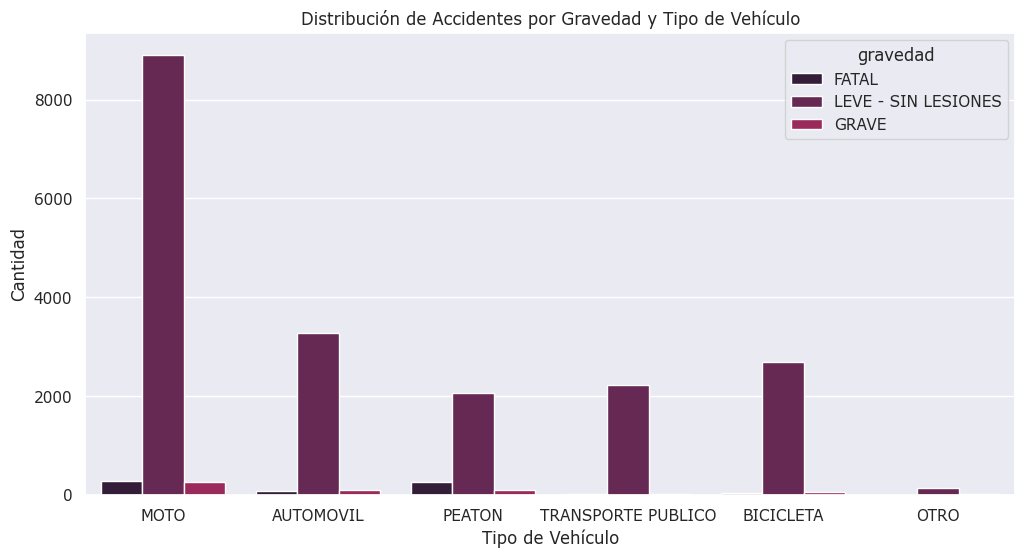

In [4]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid",palette='rocket',font="Verdana",font_scale=1)
sns.countplot(data=vehiculo_gravedad, x="vehiculo_1", hue="gravedad")
plt.title('Distribución de Accidentes por Gravedad y Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel("Cantidad")
plt.show()

In [5]:
resultado = vehiculo_gravedad.groupby('vehiculo_1')['gravedad'].value_counts().unstack(fill_value=0)
resultado['Total'] = resultado['FATAL'] + resultado['LEVE - SIN LESIONES'] + resultado['GRAVE']
resultado['Fatal'] = round((resultado['FATAL'] * 100 / resultado['Total']), 0) 
resultado['Grave'] = round((resultado['GRAVE'] * 100 / resultado['Total']), 0) 
resultado['Leve'] = round((resultado['LEVE - SIN LESIONES'] * 100 / resultado['Total']), 0)
resultado

gravedad,FATAL,GRAVE,LEVE - SIN LESIONES,Total,Fatal,Grave,Leve
vehiculo_1,,,,,,,
AUTOMOVIL,86,92,3284,3462,2.0,3.0,95.0
BICICLETA,27,59,2694,2780,1.0,2.0,97.0
MOTO,275,252,8906,9433,3.0,3.0,94.0
OTRO,0,6,133,139,0.0,4.0,96.0
PEATON,251,103,2069,2423,10.0,4.0,85.0
TRANSPORTE PUBLICO,10,25,2223,2258,0.0,1.0,98.0


En línea con lo que se esperaba encontrar, La mayoría de los accidentes graves están protagonizados por motos. Otro aspecto relevante de este gráfico es la gran cantidad de víctimas fatales como peatones. Ya había notado anteriormente la cuestión de ancianos atropellados, y con este análisis se refuerza la tendencia. Notar que con un total 4 veces menor que el de motos, tenemos apenas un 10% menos de fatalidades.

### HORA - VEHÍCULO - CALLE - COMUNA

#### Hora y Vehículo

In [17]:
hora_vehiculo1 = df_accidentes[["vehiculo_1", "franja_hora"]]
hora_vehiculo2 = df_accidentes[["vehiculo_2", "franja_hora"]]
hora_vehiculo1.rename(columns={"vehiculo_1": "vehiculo"}, inplace=True)
hora_vehiculo2.rename(columns={"vehiculo_2": "vehiculo"}, inplace=True)
hora_vehiculo = pd.concat([hora_vehiculo1, hora_vehiculo2], ignore_index=True)
hora_vehiculo.drop(hora_vehiculo[hora_vehiculo['vehiculo'] == 'SD'].index, inplace=True)
hora_vehiculo.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9084\1642157103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hora_vehiculo1.rename(columns={"vehiculo_1": "vehiculo"}, inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9084\1642157103.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hora_vehiculo2.rename(columns={"vehiculo_2": "vehiculo"}, inplace=True)


,vehiculo,franja_hora
0,MOTO,4
1,AUTOMOVIL,1
2,MOTO,7
3,MOTO,0
4,MOTO,5


In [ ]:
hora_vehiculo.sort_values(by='franja_hora', inplace=True)

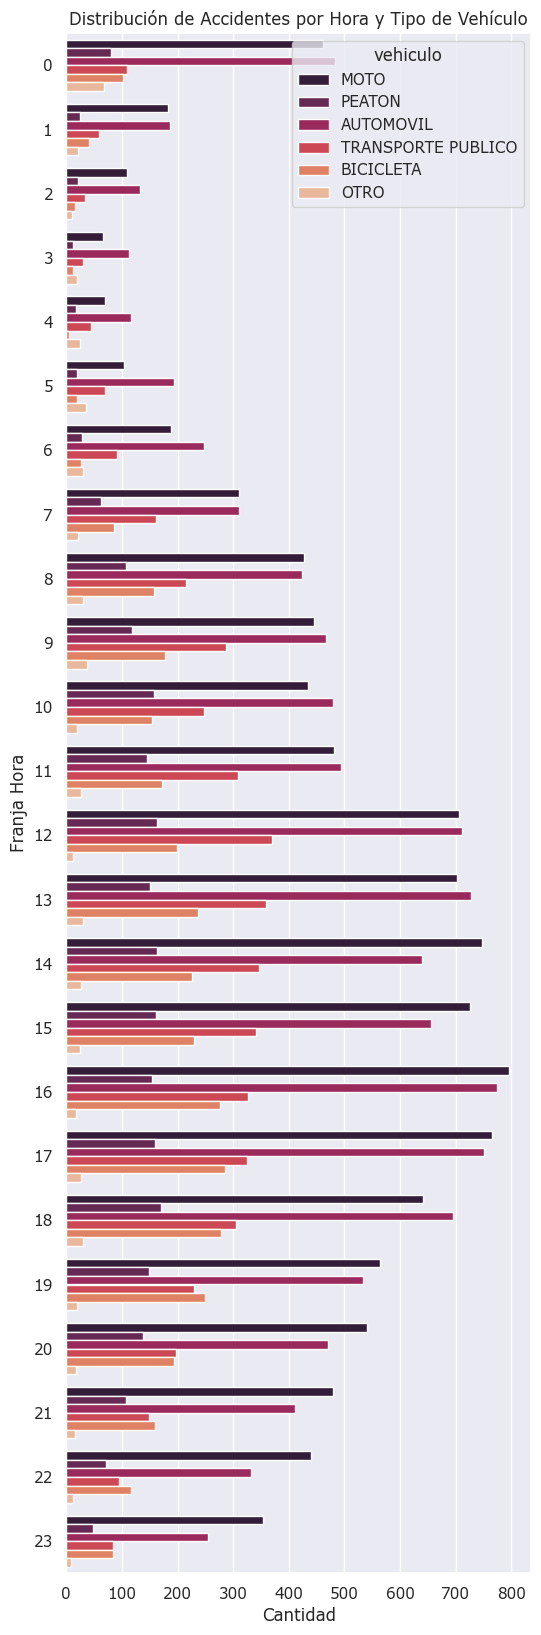

In [20]:
plt.figure(figsize=(6,20))
sns.set_theme(style="darkgrid",palette='rocket',font="Verdana",font_scale=1)
sns.countplot(data=hora_vehiculo, y="franja_hora", hue="vehiculo")
plt.title('Distribución de Accidentes por Hora y Tipo de Vehículo')
plt.xlabel('Cantidad')
plt.ylabel("Franja Hora")
plt.show()

Se observa que en las primeras horas de la tarde (14 a 16), y en las horas de la noche (19 a 24), hay prevalencia de accidentes de motos, mientras que en horas de la madrugada (2 a 6), hay una leve mayoría de accidentes de autos. En cuanto a transporte público, peatones y ciclistas, se da un aumento de accidentes en las horas del día de mayor actividad general (9 a 20). 

#### Hora y Comuna

In [28]:
hora_comuna = df_accidentes[["franja_hora", "comuna"]]
hora_comuna.drop(hora_comuna[hora_comuna['comuna'] == 'SD'].index, inplace=True)
hora_comuna.sort_values(by=["franja_hora", "comuna"], inplace=True)
hora_comuna

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9084\3496859046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hora_comuna.drop(hora_comuna[hora_comuna['comuna'] == 'SD'].index, inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9084\3496859046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hora_comuna.sort_values(by=["franja_hora", "comuna"], inplace=True)


,franja_hora,comuna
65,0,1
457,0,1
545,0,1
1096,0,1
1097,0,1
...,...,...
25431,23,9
25641,23,9
26533,23,9
27653,23,9


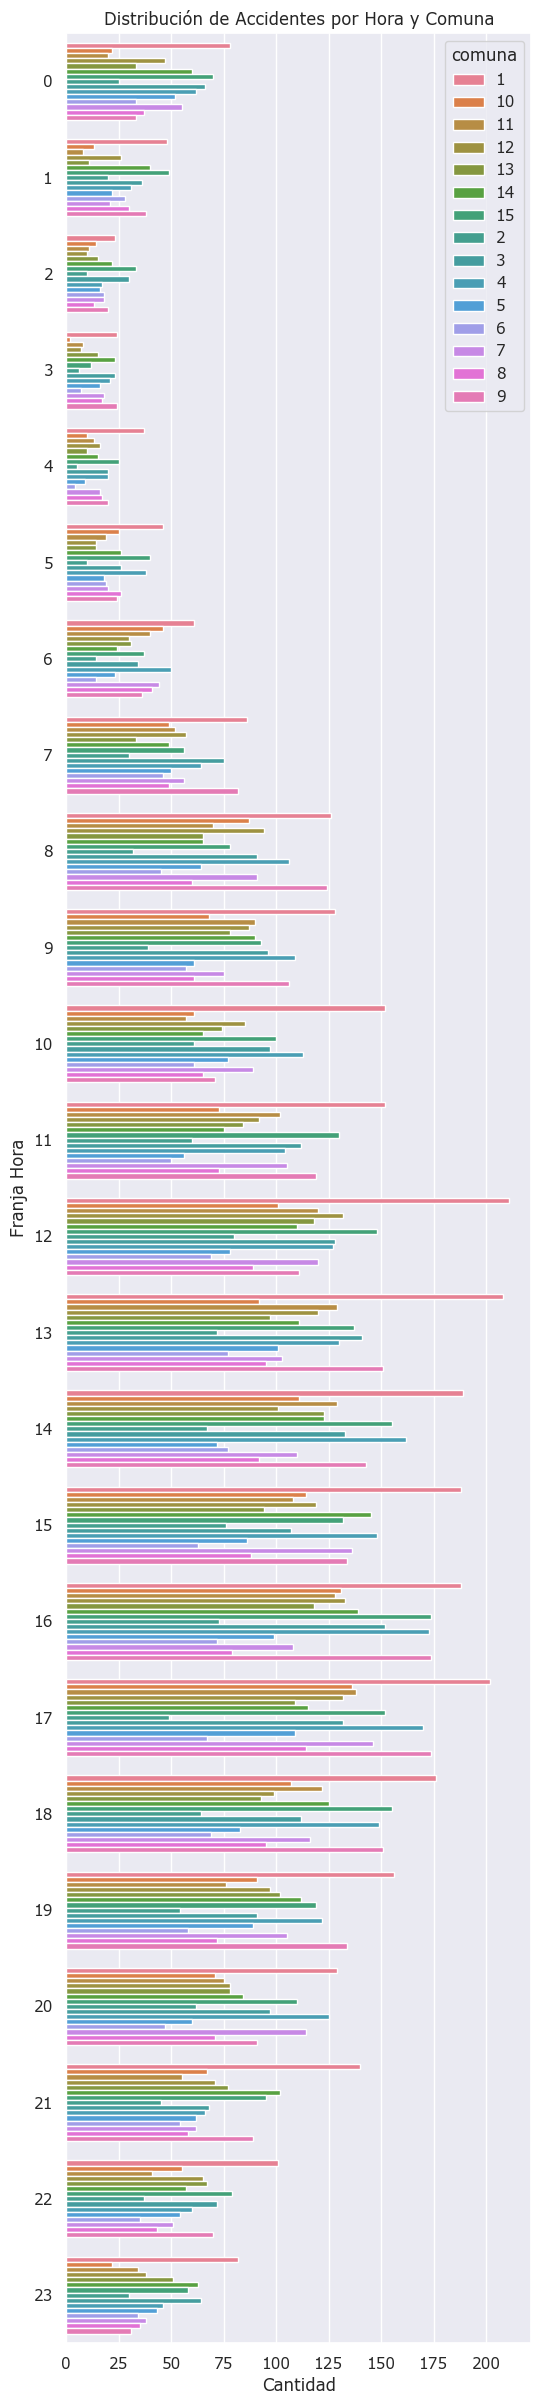

In [29]:
plt.figure(figsize=(6,30))
sns.set_theme(style="darkgrid",palette='rocket',font="Verdana",font_scale=1)
sns.countplot(data=hora_comuna, y="franja_hora", hue="comuna")
plt.title('Distribución de Accidentes por Hora y Comuna')
plt.xlabel('Cantidad')
plt.ylabel("Franja Hora")
plt.show()

<img src="../data/mapa_comunas.jpg" alt="Texto alternativo" width="600">

La prevalencia de accidentes en la zona del "microcentro" (comunas 1, 3 y 4), se hace más notoria durante las jornadas laborales normales, desde media mañana hasta la tarde.

#### Hora y Tipo de Calle

In [30]:
hora_calle = df_accidentes[["franja_hora", "tipo_calle"]]
hora_calle.drop(hora_calle[hora_calle['tipo_calle'] == 'SD'].index, inplace=True)
hora_calle.sort_values(by=["franja_hora"], inplace=True)
hora_calle

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9084\2736010960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hora_calle.drop(hora_calle[hora_calle['tipo_calle'] == 'SD'].index, inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9084\2736010960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hora_calle.sort_values(by=["franja_hora"], inplace=True)


,franja_hora,tipo_calle
24365,0,CALLE
21053,0,AVENIDA
25094,0,AVENIDA
18316,0,AVENIDA
16308,0,AVENIDA
...,...,...
22147,23,AVENIDA
26222,23,GRAL PAZ
26221,23,GRAL PAZ
22223,23,AVENIDA


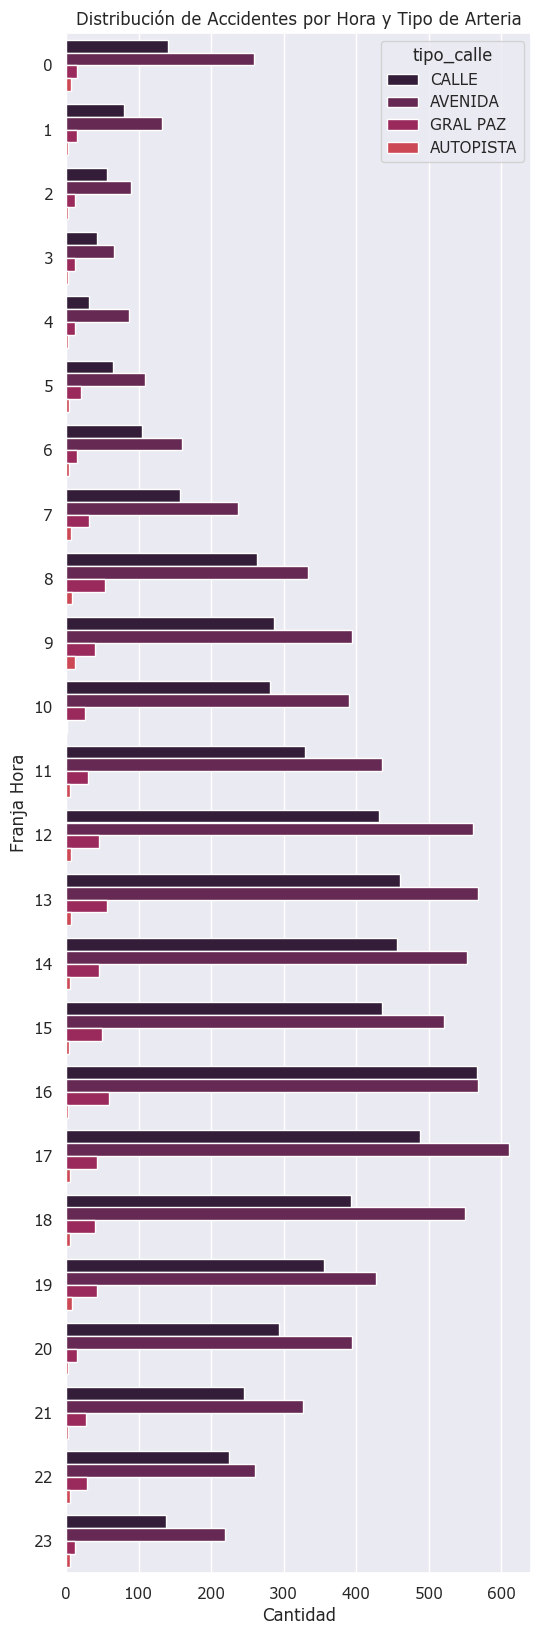

In [31]:
plt.figure(figsize=(6,20))
sns.set_theme(style="darkgrid",palette='rocket',font="Verdana",font_scale=1)
sns.countplot(data=hora_calle, y="franja_hora", hue="tipo_calle")
plt.title('Distribución de Accidentes por Hora y Tipo de Arteria')
plt.xlabel('Cantidad')
plt.ylabel("Franja Hora")
plt.show()

Este gráfico no aporta datos relevantes.

#### Análisis puntual de fallecidos o heridos graves como peatones por comuna.

In [39]:
peatones1 = df_accidentes[["vehiculo_1", "gravedad", "comuna"]]
peatones2 = df_accidentes[["vehiculo_2", "gravedad", "comuna"]]
peatones1.rename(columns={"vehiculo_1": "vehiculo"}, inplace=True)
peatones2.rename(columns={"vehiculo_2": "vehiculo"}, inplace=True)
peatones = pd.concat([peatones1, peatones2], ignore_index=True)

peatones.drop(peatones[peatones['vehiculo'] != 'PEATON'].index, inplace=True)
peatones.drop(peatones[peatones['gravedad'] == 'LEVE - SIN LESIONES'].index, inplace=True)
peatones.drop(peatones[peatones['comuna'] == 'SD'].index, inplace=True)
peatones.sort_values(by=["comuna"], inplace=True)
peatones.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9084\1823600677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peatones1.rename(columns={"vehiculo_1": "vehiculo"}, inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9084\1823600677.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peatones2.rename(columns={"vehiculo_2": "vehiculo"}, inplace=True)


,vehiculo,gravedad,comuna
9,PEATON,FATAL,1
14687,PEATON,GRAVE,1
165,PEATON,FATAL,1
14487,PEATON,GRAVE,1
477,PEATON,FATAL,1


In [40]:
peatones["comuna"].value_counts()

comuna
1     56
4     32
15    29
9     28
7     27
14    25
8     23
3     21
13    20
2     17
5     13
11    11
10    10
12    10
6      9
Name: count, dtype: int64

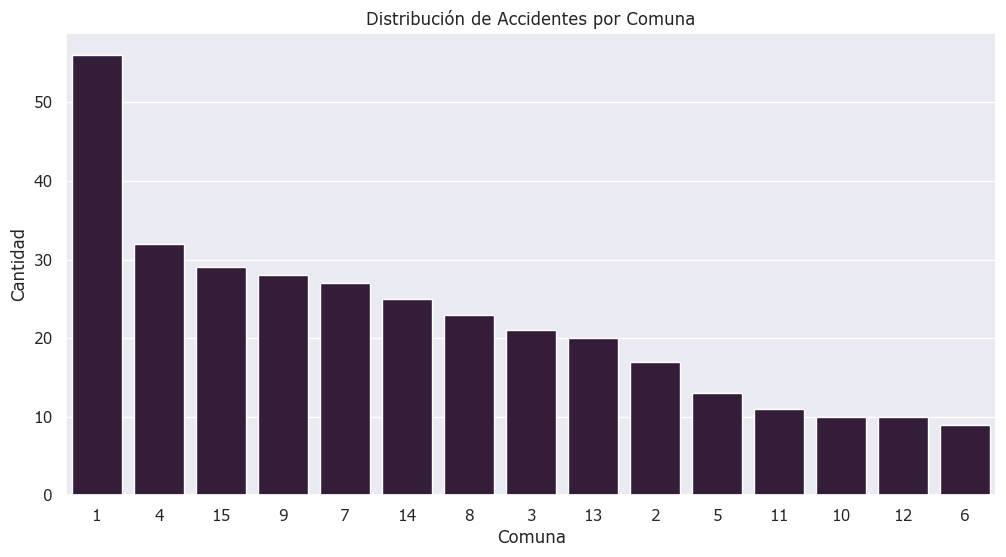

In [42]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid",palette='rocket',font="Verdana",font_scale=1)
sns.barplot(x=peatones["comuna"].value_counts().index, y=peatones["comuna"].value_counts())
plt.title('Distribución de Accidentes por Comuna')
plt.xlabel('Comuna')
plt.ylabel("Cantidad")
plt.show()

Como esperaba que suceda, el problema del atropello de peatones se da en el microcentro.